In [1]:
from PIL import Image
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
from balance_tweezer_functions import TweezerBalancer

In [2]:
balancer = TweezerBalancer()

2
0  


gotem (img 1/1)
gotem (img 1/1)
gotem (img 1/1)
[1076, 1177, 980]
0  
gotem (img 1/1)


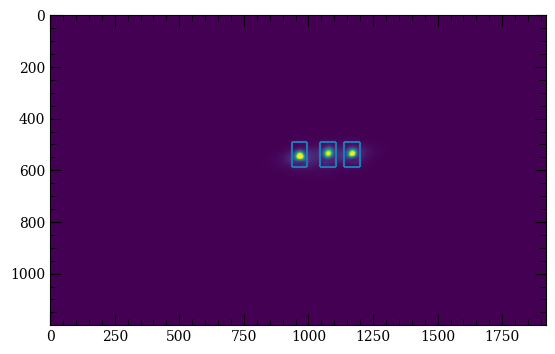

In [3]:
#run to test what the tweezers and box sizes look like 

F_LIST = [71.6e6, 76.e6, 80.e6]
A_LIST = [0.06,0.2,0.08]
V_PID1 = 2.
BOX_SIZE = [30,50]

balancer.update_test_params(f_list = F_LIST, a_list = A_LIST, box_size = BOX_SIZE, v_pid1 = V_PID1)
balancer.init_tweezers(f_list = balancer.F_LIST, a_list=balancer.A_LIST)

image = balancer.grab_image()
tweezer_rois = balancer.find_tweezer_rois(image, balancer.BOX_SIZE)
balancer.plot_tweezer_rois(image, tweezer_rois)
plt.show()

In [4]:
#rest of  our variables
# F_LIST = [76.e6,80.e6]
PERCENTAGE_ERROR = [100.,100.]
GOAL_ERROR = 1.
P_GAIN_CONSTANT = 2.e-8

balancer.update_params(box_size = BOX_SIZE, f_list = F_LIST,a_list = A_LIST, 
                       percentage_error = PERCENTAGE_ERROR, goal_error = GOAL_ERROR, 
                       p_gain_constant = P_GAIN_CONSTANT, v_pid1 = V_PID1)

gotem (img 1/1)
gotem (img 1/1)
gotem (img 1/1)
[1075, 1168, 965]
0  


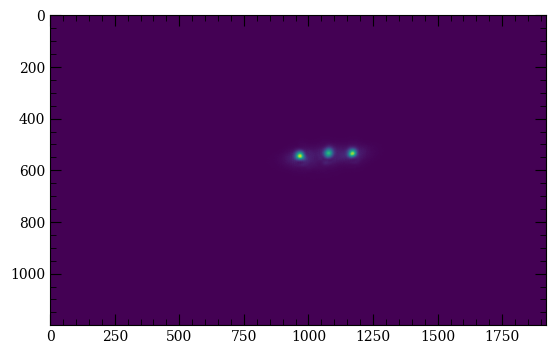

0  
1.2999999999999994
gotem (img 1/1)


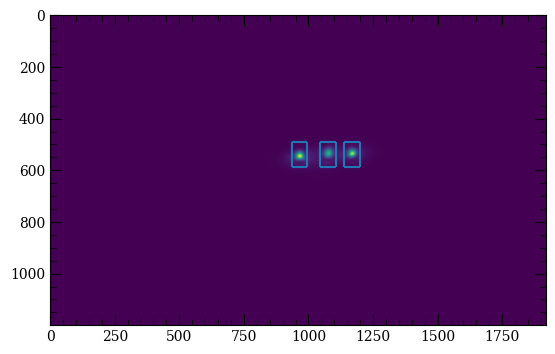

In [5]:
v_pid1 = balancer.unsaturate_pixels()
print(v_pid1)
image = balancer.grab_image()
plt.imshow(image)
balancer.plot_tweezer_rois(image, tweezer_rois)

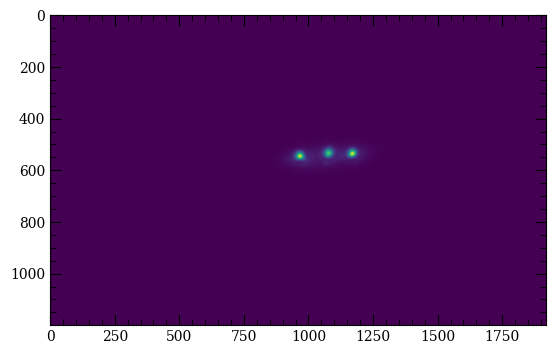

[0.20236133 0.07993571 0.05770297]
Final Amplitude List (not normalized): [0.20236133 0.07993571 0.05770297]


In [6]:
# MEAN_PIXELS = init_mean_pixels()
imgs = []
negativeamplitudes = False
whilebool = True
tweezer_order = balancer.get_tweezer_order()
print(f"tweezer order is: {tweezer_order}")


while whilebool:
    balancer.init_tweezers(f_list = balancer.F_LIST, a_list=balancer.A_LIST)
    image = balancer.grab_image()
    tweezer_rois = balancer.find_tweezer_rois(image, balancer.BOX_SIZE)
    balancer.PERCENTAGE_ERROR, pixel_differences = balancer.get_error(image, tweezer_rois)
    for i in balancer.A_LIST:
        if i < 0:
            print("negative number in amplitude list")
            negativeamplitudes = True
            break
    if negativeamplitudes: 
        break
    balancer.update_a_list(pixel_differences, tweezer_order)
    clear_output()
    plt.imshow(image)
    plt.show()
    imgs.append(image)

    whilebool = not all((np.abs(i) < balancer.GOAL_ERROR) for i in balancer.PERCENTAGE_ERROR)
    
    # print(balancer.A_LIST)
    
print("Final Amplitude List (not normalized):", balancer.A_LIST)

In [7]:
#want to increase brightness until sum of amplitudes is 1
normalized_a_list = balancer.normalize_a_list()
print("Final Amplitude List:", normalized_a_list)

Final Amplitude List: [0.5951803725490196, 0.23510501960784314, 0.16971460784313724]


In [8]:
imgs = [Image.fromarray(img) for img in imgs]
# duration is the number of milliseconds between frames; this is 40 frames per second
imgs[0].save("tweezer_stabilization.gif", save_all=True, append_images=imgs[1:], duration=20, loop=0)


In [9]:
# plt.imshow(imgs[-1])